# Setting up variables

In [262]:
dx = 0.01
dt = 0.0005
hcut = 1
m = 1

l = (hcut*dt)/(2*m*dx*dx)
print(l)

2.5


In [263]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

In [264]:
x = np.round(np.arange(-2,2+dx,dx),3)

In [265]:
def v(arr, m_wells, p1, w, s, v1, l1):
    result = []
    for r in arr:
        val = 0
        if r >= -l1 and r <= l1:
            for i in range(m_wells):
                start = p1 + i*(w+s)
                end = start + w
                if r >= start and r <= end:
                    val = v1
                    break
        result.append(val)
    return result


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

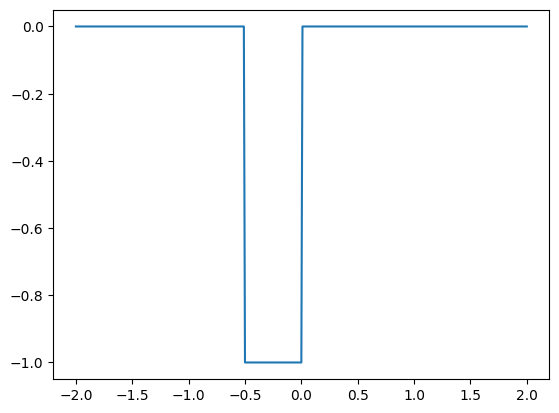

In [266]:
v_x = np.array(v(x,1,-0.5,0.5,0,-1,2))
print(v_x)
plt.plot(x,v_x)
plt.show()

In [267]:
main_diag_A = 1+ 1j*l + 1j*dt/(2*hcut)*v_x
off_diag_A = (-1j*l/2)*np.ones(len(x)-1)

diagA = diags([off_diag_A,main_diag_A,off_diag_A],offsets=[-1,0,1],)
print(diagA)

  (np.int32(1), np.int32(0))	-1.25j
  (np.int32(2), np.int32(1))	-1.25j
  (np.int32(3), np.int32(2))	-1.25j
  (np.int32(4), np.int32(3))	-1.25j
  (np.int32(5), np.int32(4))	-1.25j
  (np.int32(6), np.int32(5))	-1.25j
  (np.int32(7), np.int32(6))	-1.25j
  (np.int32(8), np.int32(7))	-1.25j
  (np.int32(9), np.int32(8))	-1.25j
  (np.int32(10), np.int32(9))	-1.25j
  (np.int32(11), np.int32(10))	-1.25j
  (np.int32(12), np.int32(11))	-1.25j
  (np.int32(13), np.int32(12))	-1.25j
  (np.int32(14), np.int32(13))	-1.25j
  (np.int32(15), np.int32(14))	-1.25j
  (np.int32(16), np.int32(15))	-1.25j
  (np.int32(17), np.int32(16))	-1.25j
  (np.int32(18), np.int32(17))	-1.25j
  (np.int32(19), np.int32(18))	-1.25j
  (np.int32(20), np.int32(19))	-1.25j
  (np.int32(21), np.int32(20))	-1.25j
  (np.int32(22), np.int32(21))	-1.25j
  (np.int32(23), np.int32(22))	-1.25j
  (np.int32(24), np.int32(23))	-1.25j
  (np.int32(25), np.int32(24))	-1.25j
  :	:
  (np.int32(375), np.int32(376))	-1.25j
  (np.int32(376), np.in

In [268]:
main_diag_B = 1- 1j*l - 1j*dt/(2*hcut)*v_x
off_diag_B = (1j*l/2)*np.ones(len(x)-1)

diagB = diags([off_diag_B,main_diag_B,off_diag_B],offsets=[-1,0,1],)
print(diagB.shape)

(401, 401)


## initial gaussian fn

In [269]:
mean = -2/2
std = 2/10
k0 = 2*(-1)
psi0 = (1/(np.sqrt(2*np.pi)*std))*np.exp(-0.5*((x-mean)/std)**2)


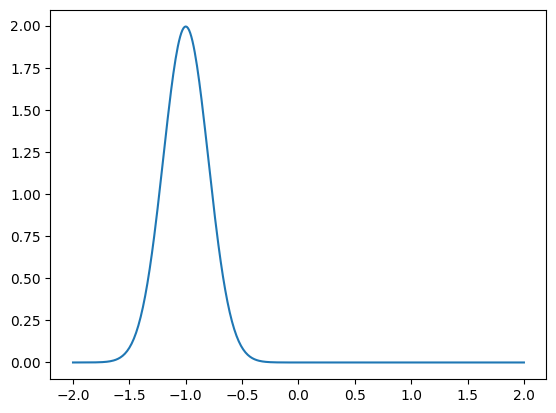

In [270]:
plt.plot(x,psi0)
plt.show()

In [271]:
d = diagB@psi0


In [ ]:
snapshots = []
times = []

psi_current = psi0.copy()



C:\Users\SOUNAK\AppData\Local\Temp\ipykernel_19528\1169701543.py:14: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  psi_current = spsolve(diagA, d)


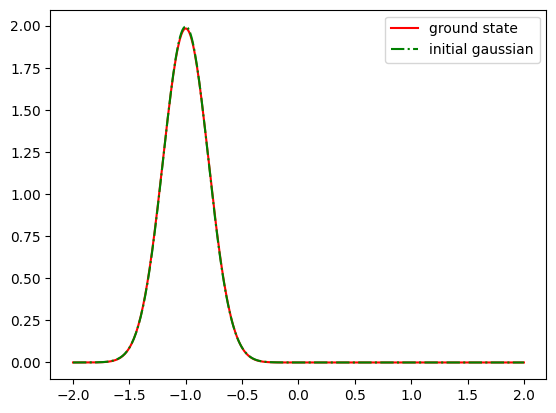

In [273]:
plt.plot(x,snapshots[0],color='r',label='ground state')
plt.plot(x,psi0,color='g',linestyle='-.',label = 'initial gaussian')
plt.legend()
plt.show()



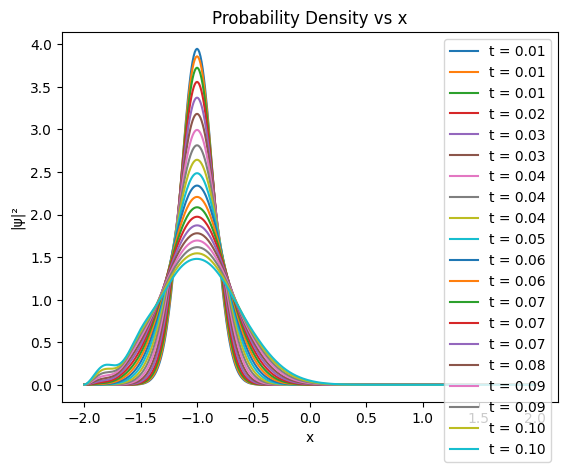

In [274]:
plt.figure()

for i, psi_snap in enumerate(snapshots):
    plt.plot(x, np.abs(psi_snap)**2, label=f"t = {times[i]:.2f}")

plt.title("Probability Density vs x")
plt.xlabel("x")
plt.ylabel("|ψ|²")
plt.legend()
plt.show()